In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [2]:
#Loading the datasets

In [3]:
credits= pd.read_csv('../input/tmdb_5000_credits.csv')
movies= pd.read_csv('../input/tmdb_5000_movies.csv')

In [4]:
#Looking the datasets

In [5]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
# Getting the info

In [8]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [10]:
# As per above - we have Null values at homepage, runtime, tagline

In [11]:
#Top 5 Rated Movies as per vote average where vote count are greter then 1000
movies[movies.vote_count>1000].sort_values(by='vote_average',ascending=False).head(5).title

1881    The Shawshank Redemption
3337               The Godfather
3232                Pulp Fiction
2731      The Godfather: Part II
2294               Spirited Away
Name: title, dtype: object

In [12]:
#Avevage rating as per the years

In [13]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [14]:
movies['Year'] = movies['release_date'].apply(lambda time: time.year)
movies['Month'] = movies['release_date'].apply(lambda time: time.month)
movies['Day of Week'] = movies['release_date'].apply(lambda time: time.dayofweek)

In [15]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}


In [16]:
movies['Day of Week'] = movies['Day of Week'].map(dmap)

In [17]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Year,Month,Day of Week
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,12.0,Thu
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0,Sat
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,10.0,Mon
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,7.0,Mon
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,3.0,Wed


In [18]:
#Group by year

In [19]:
groupByYear_VoteAverage = movies.groupby(by='Year',as_index=False).vote_average.mean().sort_values(by="vote_average",ascending=False)

In [20]:
groupByYear_VoteAverage.head()

,Year,vote_average
2,1927.0,8.000000
29,1957.0,7.950000
32,1960.0,7.866667
7,1934.0,7.700000
12,1939.0,7.666667


In [21]:
#Top 30 years in which average ratings are high

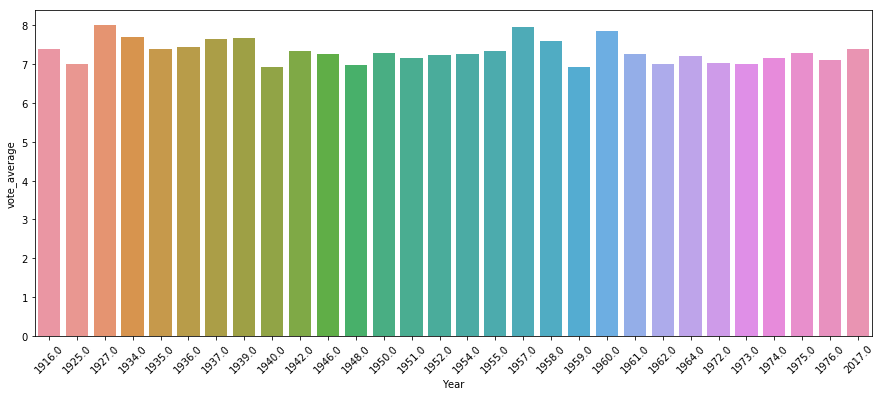

In [22]:
plt.figure(figsize=(15,6))
g = sns.barplot(x='Year',y='vote_average',data=groupByYear_VoteAverage.head(30))
for i in g.get_xticklabels():
    i.set_rotation(45)

In [23]:
#Top movies with with highest profits

In [24]:
movies['profits'] = movies['revenue']-movies['budget']

In [25]:
hp_Df= movies.sort_values('profits',ascending=False).head(5)[['original_title','profits','budget','revenue']]

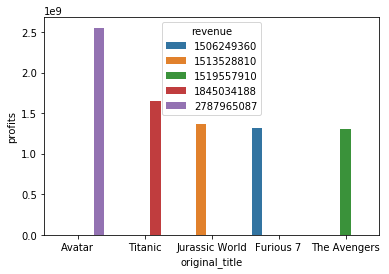

In [26]:
sns.barplot(x='original_title',y='profits',data=hp_Df,hue='revenue')

In [27]:
#No of releases in a year

In [28]:
movies.status.unique()

array(['Released', 'Post Production', 'Rumored'], dtype=object)

In [29]:
statusDf = movies['status'].value_counts()

In [30]:
statusDf

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [31]:
#Release group by Year

In [32]:
groupByYear = movies.groupby(by=['Year','status'], as_index='status')['status'].count().unstack()

In [33]:
groupByYear.fillna(0,inplace=True)

In [34]:
groupByYear.tail()

status,Post Production,Released,Rumored
Year,,,
2013.0,0.0,231.0,0.0
2014.0,0.0,238.0,0.0
2015.0,2.0,214.0,0.0
2016.0,0.0,104.0,0.0
2017.0,0.0,1.0,0.0


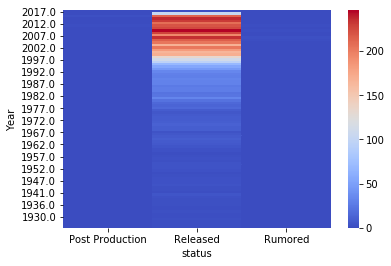

In [35]:
sns.heatmap(groupByYear.sort_values(by='Year',ascending=False),cmap='coolwarm')

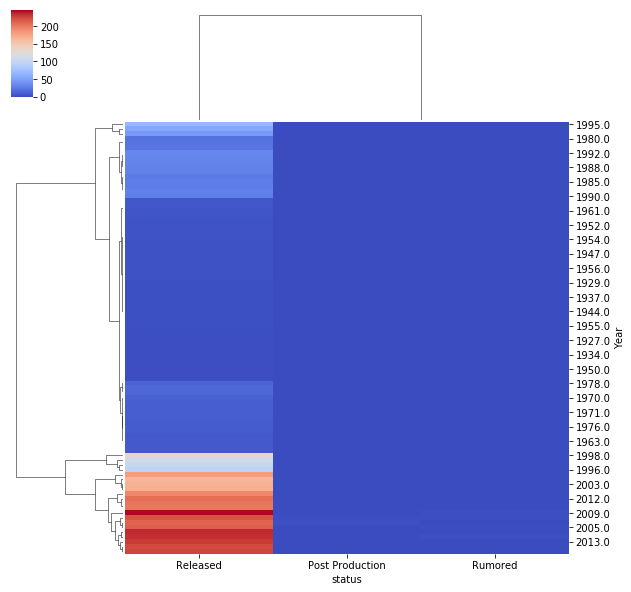

In [36]:
sns.clustermap(groupByYear.sort_values(by='Year',ascending=False),cmap='coolwarm')

In [37]:
#No of movies by an actor

In [38]:
import json
castsList = []
def toJson(x):
    l = json.loads(x)
    castsList.extend(l)

In [39]:
credits['cast'].apply(lambda x:toJson(x));

In [40]:
castsDf = pd.DataFrame(castsList)

In [41]:
castsDf['name'].value_counts().head()

Samuel L. Jackson    67
Robert De Niro       57
Bruce Willis         51
Matt Damon           48
Morgan Freeman       46
Name: name, dtype: int64

In [42]:
castSeries=castsDf['name'].value_counts()

In [43]:
castDfNew=pd.DataFrame(castSeries,).reset_index()

In [44]:
castDfNew.columns = ['name','movies_count']

In [45]:
uniqueCastDf = castsDf[['name','gender']].drop_duplicates()

In [46]:
uniqueCastDf =pd.merge(castDfNew,uniqueCastDf,on='name')

In [47]:
gender ={0:'Unknown',1:'Female',2:'Male'}

In [48]:
uniqueCastDf['gender']=uniqueCastDf['gender'].map(gender);

In [49]:
#Top 5 Male Cast with most movie

In [50]:
uniqueCastDf[uniqueCastDf['gender']=='Male'].head(5)

,name,movies_count,gender
0,Samuel L. Jackson,67,Male
1,Robert De Niro,57,Male
2,Bruce Willis,51,Male
3,Matt Damon,48,Male
4,Morgan Freeman,46,Male


In [51]:
#Top 5 Female Cast with most movies

In [52]:
uniqueCastDf[uniqueCastDf['gender']=='Female'].head(5)

,name,movies_count,gender
19,Susan Sarandon,36,Female
38,Sigourney Weaver,33,Female
42,Julia Roberts,33,Female
50,Julianne Moore,31,Female
56,Cameron Diaz,31,Female


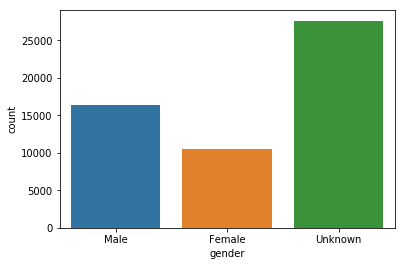

In [53]:
sns.countplot(x='gender',data=uniqueCastDf)

In [54]:
uniqueCastDf.head(5)

,name,movies_count,gender
0,Samuel L. Jackson,67,Male
1,Robert De Niro,57,Male
2,Bruce Willis,51,Male
3,Matt Damon,48,Male
4,Morgan Freeman,46,Male


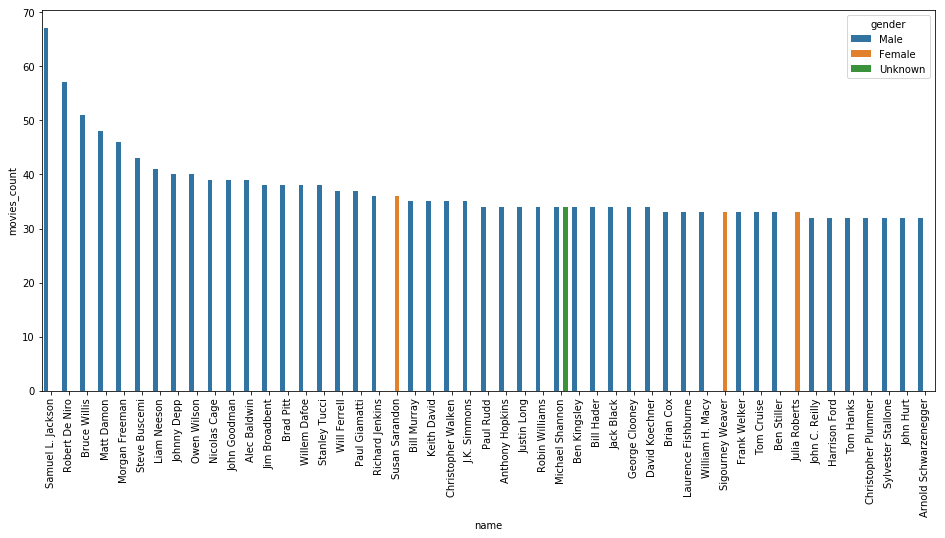

In [55]:
plt.figure(figsize=(16,7))
t =sns.barplot(x='name',y='movies_count',hue='gender',data=uniqueCastDf.head(50))
for i in t.get_xticklabels():
    i.set_rotation(90)

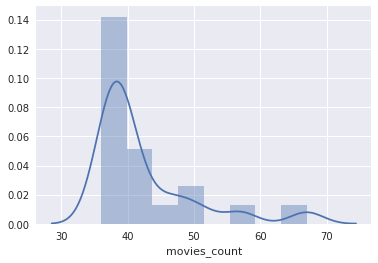

In [56]:
sns.set()
sns.distplot(uniqueCastDf['movies_count'].head(20))

In [57]:
#Creating a new column genre_list which 

In [58]:
movies[movies['genres'].isnull()] # we all genres

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Year,Month,Day of Week,profits


In [59]:
def genresToList(x):
    json=pd.read_json(x)
    if(json.empty):
        return []
    else:
        return json['name'].tolist()
        
        

In [60]:
movies['genres_list']=movies['genres'].apply(lambda x:genresToList(x))

In [61]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Year,Month,Day of Week,profits,genres_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,12.0,Thu,2550965087,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0,Sat,661000000,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,10.0,Mon,635674609,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,7.0,Mon,834939099,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,3.0,Wed,24139100,"[Action, Adventure, Science Fiction]"


In [62]:
genres = []
def addToList(x):
    genres.extend(x)
    

In [63]:
movies['genres_list'].map(addToList);

In [64]:
genresDf = pd.DataFrame(genres,columns=['Genre'])

In [65]:
genresDf['Genre'].value_counts()

Drama              2297
Comedy             1722
Thriller           1274
Action             1154
Romance             894
Adventure           790
Crime               696
Science Fiction     535
Horror              519
Family              513
Fantasy             424
Mystery             348
Animation           234
History             197
Music               185
War                 144
Documentary         110
Western              82
Foreign              34
TV Movie              8
Name: Genre, dtype: int64

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

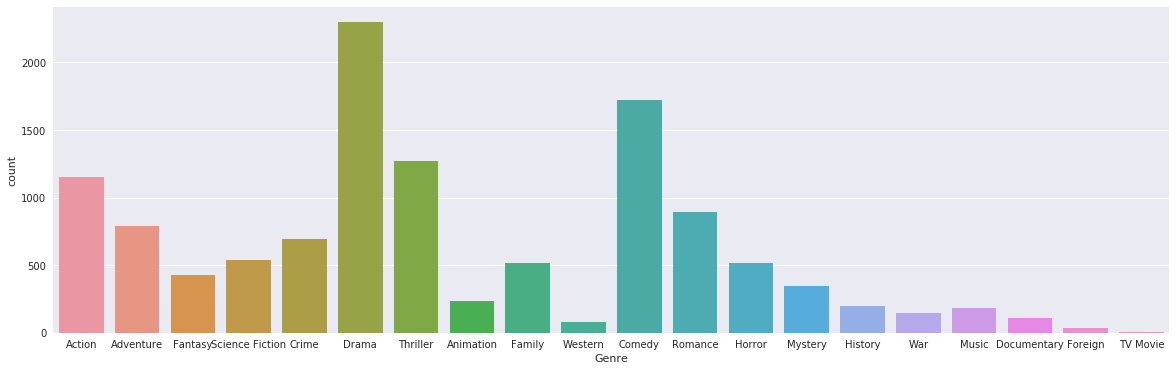

In [67]:
plt.figure(figsize=(20,6))
sns.countplot(x='Genre',data=genresDf,)

In [68]:
#Movies with highest budget

In [69]:
topTenMoviesNyBudget = movies.sort_values(by='budget',ascending=False).head(10)

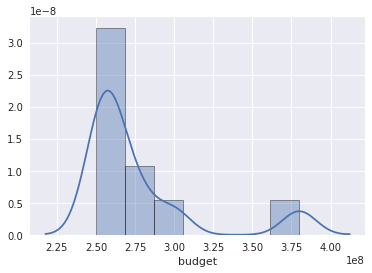

In [70]:
sns.distplot(topTenMoviesNyBudget['budget'],hist_kws=dict(edgecolor="k", linewidth=1))

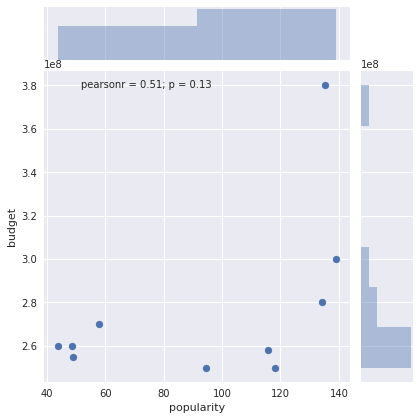

In [71]:
sns.jointplot(x='popularity',y='budget',data=topTenMoviesNyBudget)

In [72]:
#Convert Release to day month year

In [73]:
movies['release_date'] = pd.to_datetime(movies['release_date'])


In [74]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Year,Month,Day of Week,profits,genres_list
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2009.0,12.0,Thu,2550965087,"[Action, Adventure, Fantasy, Science Fiction]"
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,2007.0,5.0,Sat,661000000,"[Adventure, Fantasy, Action]"
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,2015.0,10.0,Mon,635674609,"[Action, Adventure, Crime]"
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,2012.0,7.0,Mon,834939099,"[Action, Crime, Drama, Thriller]"
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,2012.0,3.0,Wed,24139100,"[Action, Adventure, Science Fiction]"


In [75]:
byMonth = movies.groupby('Month').count()
byMonth.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,Year,Day of Week,profits,genres_list
Month,,,,,,,,,,,,,,,,,,,,,,,,
1.0,382,382,122,382,382,382,382,382,382,382,382,382,382,382,382,382,275,382,382,382,382,382,382,382
2.0,326,326,111,326,326,326,326,326,326,326,326,326,326,326,326,326,279,326,326,326,326,326,326,326
3.0,372,372,130,372,372,372,372,372,372,372,372,372,372,372,372,372,313,372,372,372,372,372,372,372
4.0,350,350,126,350,350,350,350,349,350,350,350,350,350,350,350,350,298,350,350,350,350,350,350,350
5.0,363,363,129,363,363,363,363,363,363,363,363,363,363,363,363,363,295,363,363,363,363,363,363,363


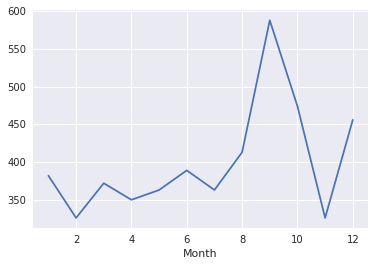

In [76]:
byMonth['release_date'].plot()


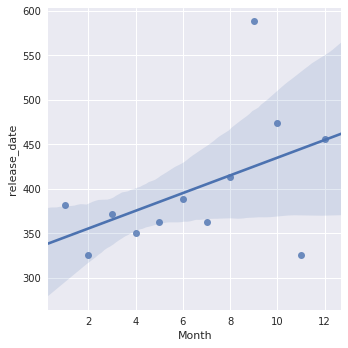

In [77]:
sns.lmplot(x='Month',y='release_date',data=byMonth.reset_index())

In [78]:
rel = movies.groupby(by=['Day of Week','Year']).count()['release_date'].unstack()
rel.head()

Year,1916.0,1925.0,1927.0,1929.0,1930.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fri,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,4.0,NaN,1.0,NaN,2.0,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,1.0,NaN,...,3.0,3.0,7.0,20.0,16.0,13.0,17.0,12.0,16.0,19.0,20.0,21.0,15.0,16.0,19.0,25.0,26.0,44.0,62.0,57.0,83.0,95.0,90.0,97.0,107.0,85.0,98.0,92.0,101.0,81.0,82.0,80.0,94.0,87.0,64.0,67.0,63.0,87.0,35.0,1.0
Mon,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,3.0,2.0,NaN,1.0,1.0,NaN,NaN,2.0,1.0,1.0,3.0,2.0,NaN,2.0,2.0,2.0,3.0,1.0,3.0,9.0,9.0,12.0,15.0,5.0,5.0,11.0,10.0,20.0,11.0,13.0,9.0,8.0,14.0,6.0,13.0,7.0,2.0,NaN
Sat,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,...,NaN,1.0,2.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,1.0,NaN,NaN,2.0,NaN,5.0,3.0,3.0,1.0,5.0,1.0,9.0,7.0,9.0,7.0,2.0,9.0,19.0,16.0,8.0,3.0,24.0,11.0,17.0,12.0,13.0,20.0,7.0,3.0,NaN
Sun,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,2.0,1.0,NaN,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1.0,2.0,6.0,3.0,4.0,7.0,8.0,11.0,14.0,16.0,11.0,19.0,11.0,8.0,13.0,7.0,12.0,9.0,8.0,11.0,5.0,1.0,NaN
Thu,NaN,1.0,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,1.0,1.0,NaN,1.0,2.0,2.0,3.0,NaN,2.0,...,3.0,6.0,5.0,5.0,2.0,7.0,7.0,3.0,2.0,5.0,2.0,5.0,4.0,5.0,6.0,6.0,11.0,6.0,13.0,18.0,23.0,26.0,25.0,21.0,21.0,22.0,27.0,39.0,43.0,33.0,59.0,49.0,47.0,47.0,56.0,69.0,57.0,54.0,30.0,NaN


In [79]:
rel.fillna(0,inplace=True)

In [80]:
rel.head()

Year,1916.0,1925.0,1927.0,1929.0,1930.0,1932.0,1933.0,1934.0,1935.0,1936.0,1937.0,1938.0,1939.0,1940.0,1941.0,1942.0,1944.0,1945.0,1946.0,1947.0,1948.0,1949.0,1950.0,1951.0,1952.0,1953.0,1954.0,1955.0,1956.0,1957.0,1958.0,1959.0,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,...,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0
Day of Week,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fri,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,4.0,0.0,1.0,0.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3.0,3.0,7.0,20.0,16.0,13.0,17.0,12.0,16.0,19.0,20.0,21.0,15.0,16.0,19.0,25.0,26.0,44.0,62.0,57.0,83.0,95.0,90.0,97.0,107.0,85.0,98.0,92.0,101.0,81.0,82.0,80.0,94.0,87.0,64.0,67.0,63.0,87.0,35.0,1.0
Mon,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,...,1.0,1.0,3.0,2.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,2.0,3.0,1.0,3.0,9.0,9.0,12.0,15.0,5.0,5.0,11.0,10.0,20.0,11.0,13.0,9.0,8.0,14.0,6.0,13.0,7.0,2.0,0.0
Sat,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,5.0,3.0,3.0,1.0,5.0,1.0,9.0,7.0,9.0,7.0,2.0,9.0,19.0,16.0,8.0,3.0,24.0,11.0,17.0,12.0,13.0,20.0,7.0,3.0,0.0
Sun,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,6.0,3.0,4.0,7.0,8.0,11.0,14.0,16.0,11.0,19.0,11.0,8.0,13.0,7.0,12.0,9.0,8.0,11.0,5.0,1.0,0.0
Thu,0.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,3.0,0.0,2.0,...,3.0,6.0,5.0,5.0,2.0,7.0,7.0,3.0,2.0,5.0,2.0,5.0,4.0,5.0,6.0,6.0,11.0,6.0,13.0,18.0,23.0,26.0,25.0,21.0,21.0,22.0,27.0,39.0,43.0,33.0,59.0,49.0,47.0,47.0,56.0,69.0,57.0,54.0,30.0,0.0


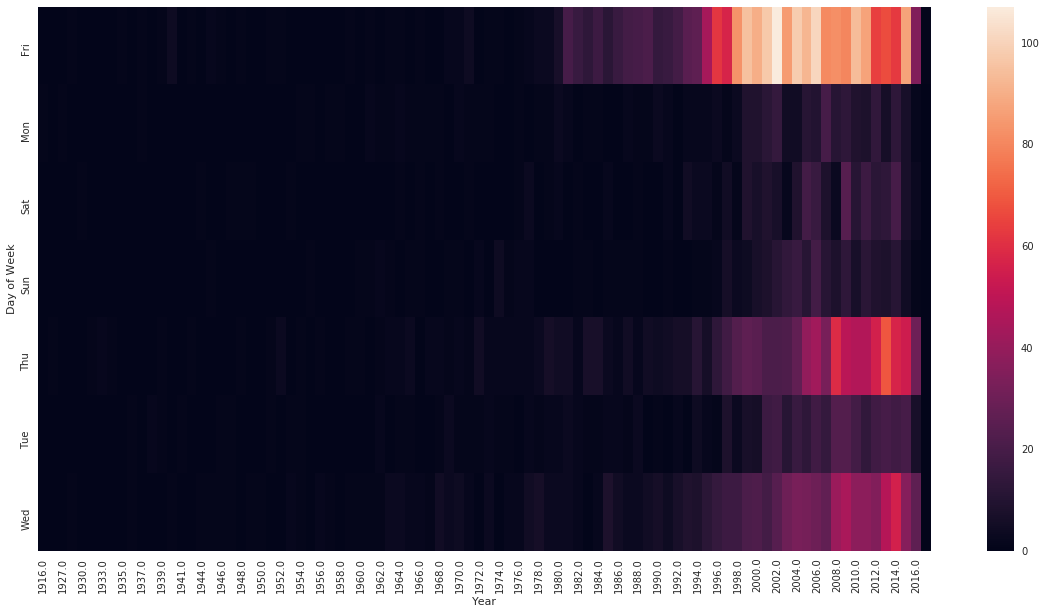

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(rel)

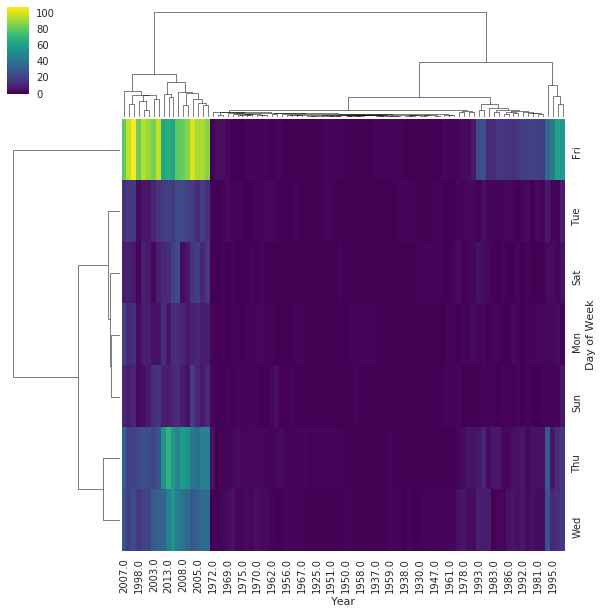

In [82]:
sns.clustermap(rel,cmap='viridis')


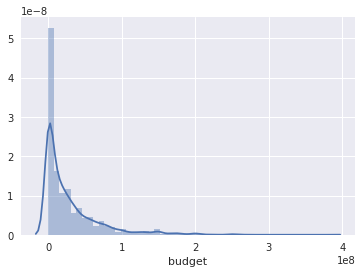

In [83]:
sns.set_style()
sns.distplot(movies.budget,norm_hist=True)


In [84]:
#END